In [1]:
import pandas as pd
import numpy as np
from efficient_apriori import apriori
import plotly.express as px

In [8]:
dataset = pd.read_csv("bread basket.csv")  # dataset
data = dataset.drop(['date_time', 'period_day', 'weekday_weekend'], axis=1)
data.head(20)

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
5,3,Cookies
6,4,Muffin
7,5,Coffee
8,5,Pastry
9,5,Bread


In [14]:
df = pd.DataFrame(data, columns=["Item"]) 
df["incident_count"] = 1 
df_table = df.groupby("Item").sum().sort_values("incident_count", ascending=False).reset_index()
#  Initial Visualizations
df_table.head(5).style.background_gradient(cmap='Greens')

,Item,incident_count
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856


In [26]:
df_table["all"] = "Top 10 items" 
# creating tree map using plotly
fig = px.treemap(df_table.head(10), path=['all', "Item"], values='incident_count',
                  )
fig.show()

In [35]:
from mlxtend.frequent_patterns import association_rules, apriori

onehot = data.pivot_table(index='Transaction', columns='Item', aggfunc=len)
onehot = onehot>0
frequent_itemsets = apriori(onehot, min_support = 0.01,  use_colnames=True)
rules = association_rules(frequent_itemsets, min_threshold=0.01) # compute association rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Alfajores),0.327205,0.036344,0.010354,0.031644,0.870657,-0.001538,0.995145
1,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818
2,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
3,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
4,(Brownie),(Bread),0.040042,0.327205,0.010777,0.269129,0.822508,-0.002326,0.920538
5,(Bread),(Brownie),0.327205,0.040042,0.010777,0.032935,0.822508,-0.002326,0.992651
6,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923
7,(Bread),(Cake),0.327205,0.103856,0.023349,0.071359,0.687097,-0.010633,0.965006
8,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731
9,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561


### * Support is an indication of how frequently the itemset appears in the dataset.

In [36]:
# extracting the most frequest itemsets
frequent_itemsets = apriori(onehot, min_support=0.01, use_colnames=True)
frequent_itemsets['count'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values("support",ascending=False)

,support,itemsets,count
6,0.478394,(Coffee),1
2,0.327205,(Bread),1
26,0.142631,(Tea),1
4,0.103856,(Cake),1
34,0.090016,"(Coffee, Bread)",2
...,...,...,...
11,0.010565,(Hearty & Seasonal),1
20,0.010460,(Salad),1
30,0.010354,"(Bread, Alfajores)",2
58,0.010037,"(Coffee, Cake, Bread)",3


In [38]:
# printing the frequency of items 
frequent_itemsets[ (frequent_itemsets['count'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ].sort_values("support")

,support,itemsets,count
42,0.054728,"(Coffee, Cake)",2
34,0.090016,"(Coffee, Bread)",2


In [41]:
# printing the frequency of items with count 3
frequent_itemsets[ (frequent_itemsets['count'] == 3) ].sort_values("support",ascending=True)

,support,itemsets,count
58,0.010037,"(Coffee, Cake, Bread)",3
60,0.010037,"(Tea, Coffee, Cake)",3
59,0.011199,"(Pastry, Coffee, Bread)",3


In [44]:
#  We set our metric as "Lift" to define whether antecedents & consequents are dependent 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
# Sort values based on confidence
rules.sort_values("confidence",ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
5,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
3,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
12,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
9,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
1,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
13,"(Coffee, Cake)",(Tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923
2,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
11,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
10,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749


### Confidence is the percentage of all transactions satisfying X that also satisfy Y supp(X,Y)/supp(X)
### Lift of a rule: ratio of the observed support for X and Y independent

In [45]:
rules.sort_values("lift", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
15,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
0,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
1,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
2,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372


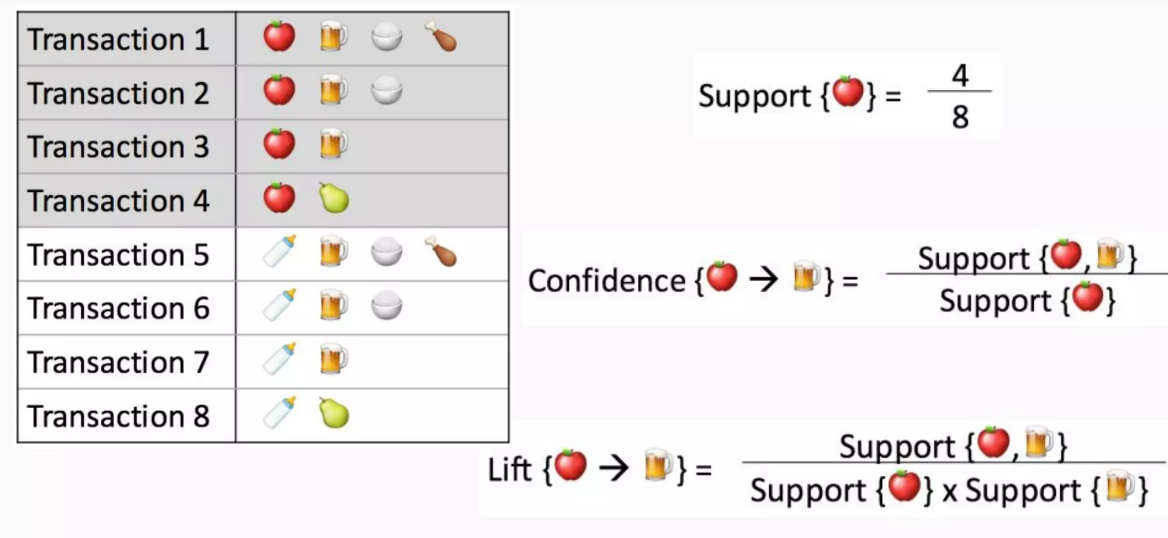

In [46]:
from IPython import display
display.Image("1.png", width=500)